#                                        Data Story and Visualization

This is the import of all the python packages

In [19]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import matplotlib as mpl
from geonamescache import GeonamesCache
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from mpl_toolkits.basemap import Basemap

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
## This is the working directory I saved for latter use

work_directory=os.getcwd()
work_directory

'C:\\Users\\Tsymbal Group Member\\OneDrive - University of Nebraska-Lincoln\\data_camp\\Springbroad\\SpringBoard_Projects\\project_data'

## Part 1.Map visulization of the Happniess Score

The dataset **2012_0.csv** is part of the dataset I got from gallup world happiness investigation. This is only for the year 2012

In [3]:
df=pd.read_csv(work_directory+'\\2012_0.csv', sep=', ', delimiter=',')
# dff=df.drop('Unnamed: 0',axis=1)
df.head()

,country,year,Life Ladder,Log GDP per capita,Confidence in national government,Social support,Healthy life expectancy at birth,Generosity,"GINI index (World Bank estimate), average 2000-13"
0,Afghanistan,2012,3.782938,7.549241,0.435440,0.520637,48.738346,0.247900,NaN
1,Albania,2012,5.510124,9.189268,0.364894,0.784502,67.942978,-0.169465,0.305000
2,Algeria,2012,5.604596,9.487703,NaN,0.839397,64.001305,-0.198894,NaN
3,Angola,2012,4.360250,8.886378,0.237091,0.752593,44.400314,-0.138073,0.473400
4,Argentina,2012,6.468387,NaN,0.418255,0.901776,66.838005,NaN,0.479421


This is the dataset from where we can get the ISO 3166 alpha-3 country code. This dataset ***is not*** to modelling the trends, is only for the world map visualization

In [4]:
country_code=pd.read_csv(work_directory+'\\slim-3.csv', sep=', ', delimiter=',')
country_code=country_code.rename(columns={'name': 'country'})
country_code.head(5)

,country,alpha-3
0,Afghanistan,AFG
1,Åland Islands,ALA
2,Albania,ALB
3,Algeria,DZA
4,American Samoa,ASM


In [5]:
##  I merged this two dataset based on the 2012_0, since it is the dataset where we have all the features

dfs=df.merge(country_code,on='country')
dfs.head()

,country,year,Life Ladder,Log GDP per capita,Confidence in national government,Social support,Healthy life expectancy at birth,Generosity,"GINI index (World Bank estimate), average 2000-13",alpha-3
0,Afghanistan,2012,3.782938,7.549241,0.435440,0.520637,48.738346,0.247900,NaN,AFG
1,Albania,2012,5.510124,9.189268,0.364894,0.784502,67.942978,-0.169465,0.305000,ALB
2,Algeria,2012,5.604596,9.487703,NaN,0.839397,64.001305,-0.198894,NaN,DZA
3,Angola,2012,4.360250,8.886378,0.237091,0.752593,44.400314,-0.138073,0.473400,AGO
4,Argentina,2012,6.468387,NaN,0.418255,0.901776,66.838005,NaN,0.479421,ARG


In [6]:
# data for the map

data_map=dfs[['country','alpha-3','year','Life Ladder']]
data_map.head()

,country,alpha-3,year,Life Ladder
0,Afghanistan,AFG,2012,3.782938
1,Albania,ALB,2012,5.510124
2,Algeria,DZA,2012,5.604596
3,Angola,AGO,2012,4.360250
4,Argentina,ARG,2012,6.468387


### Starting from this line, the reset of the code till the map visulization is used for the purpose of plotting. The code is basically from the tutorial: (http://ramiro.org/notebook/basemap-choropleth/)

In [7]:
shapefile = work_directory+'\\countries\\ne_10m_admin_0_countries'
num_colors = 9
year = '2012'
cols = ['country', 'alpha-3', year]
title = 'Happiness score {}'.format(year)

In [8]:
gc = GeonamesCache()
iso2_codes = list(gc.get_dataset_by_key(gc.get_countries(), 'iso3').keys())

In [9]:
data_map.set_index('alpha-3', inplace=True)
data_map = data_map.ix[iso2_codes].dropna()


In [10]:
values = data_map['Life Ladder']
cm = plt.get_cmap('Spectral')
scheme = [cm(i*30) for i in range(num_colors)][::-1]
# scheme=[(15,75,50,0),(3,57,63,0),(0,32,55,0),(0,12,42,0),(0,0,25,0),(10,0,40,0),(33,0,33,0),(60,0,30,0),(82,23,0,0)]
bins = np.linspace(values.min(), values.max(), num_colors)
data_map['bin'] = np.digitize(values, bins) - 1 
data_map.sort_values('bin', ascending=False).head()

,country,year,Life Ladder,bin
alpha-3,,,,
CHE,Switzerland,2012.0,7.776209,8
AUT,Austria,2012.0,7.400689,7
NLD,Netherlands,2012.0,7.470716,7
ARE,United Arab Emirates,2012.0,7.217767,7
DNK,Denmark,2012.0,7.519909,7


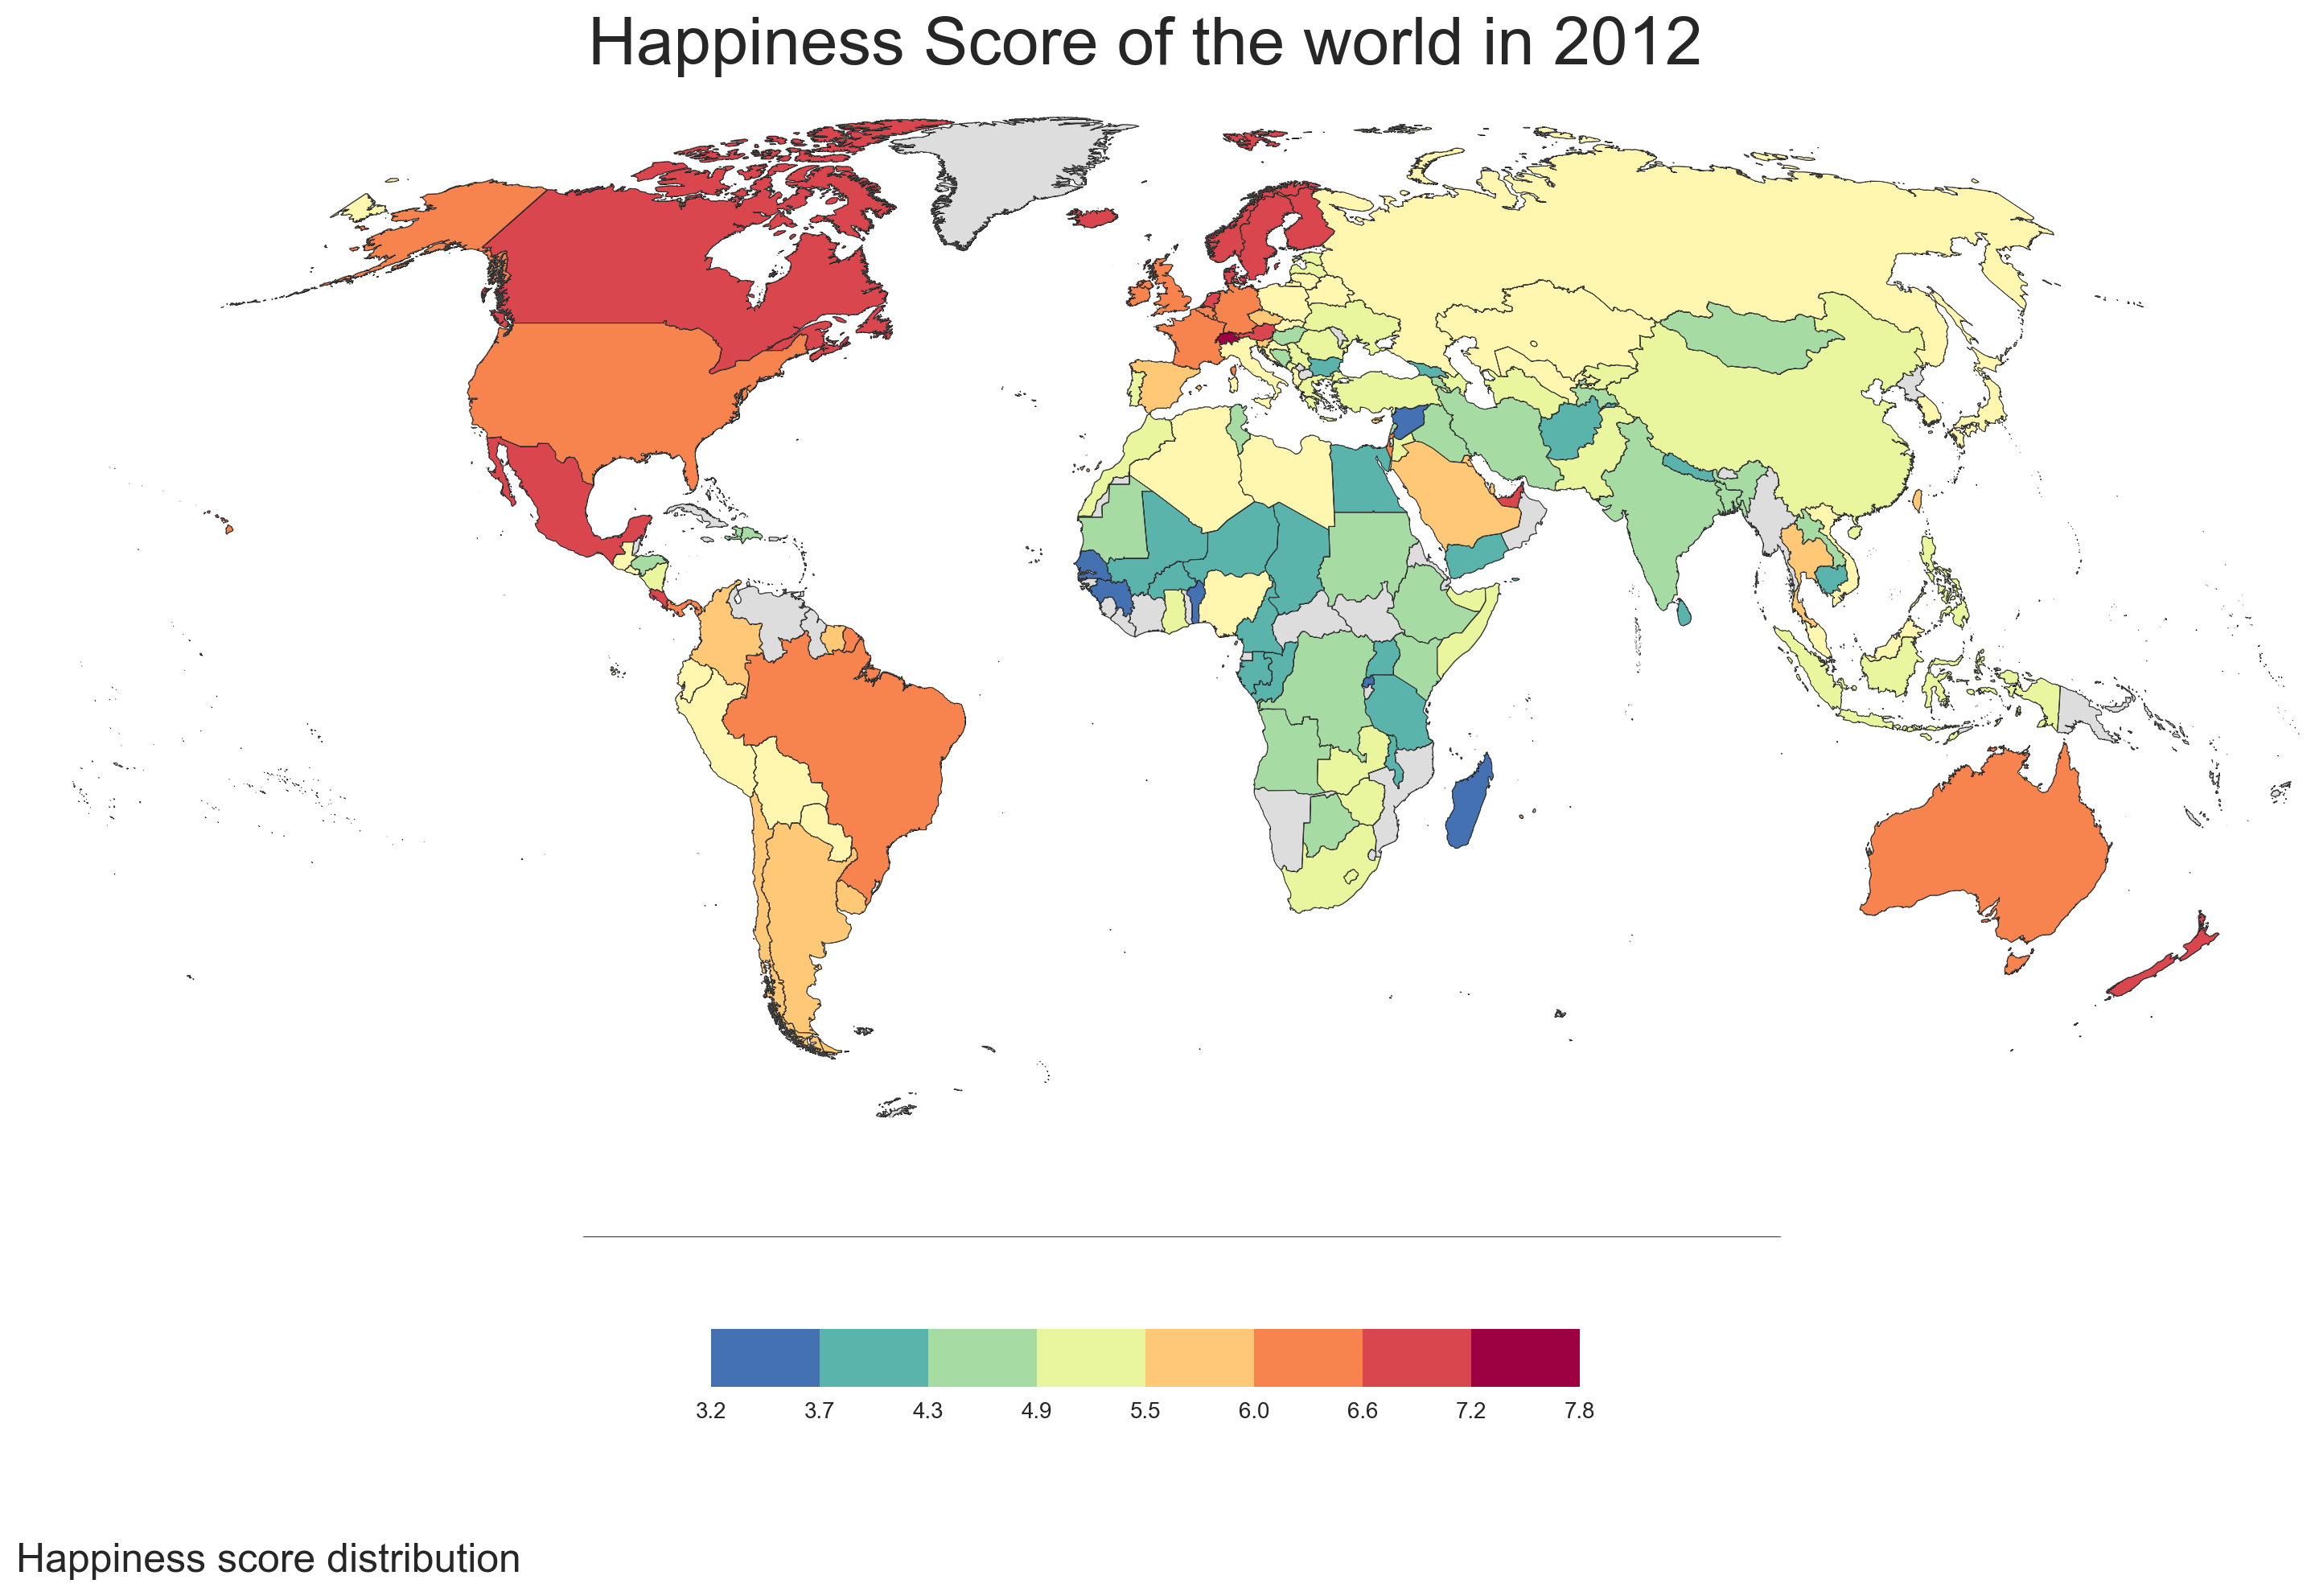

In [13]:
%config InlineBackend.figure_format = 'retina'
fig = plt.figure(figsize=(18, 12))

ax = fig.add_subplot(111, axisbg='w', frame_on=False)
fig.suptitle('Happiness Score of the world in {}'.format(year), fontsize=30, y=.85)

m = Basemap(lon_0=0, projection='robin')
m.drawmapboundary(color='w')


m.readshapefile(shapefile, 'units', color='#444444', linewidth=.2)
for info, shape in zip(m.units_info, m.units):
    iso2 = info['ADM0_A3_US']
    if iso2 not in data_map.index:
        color = '#dddddd'
    else:
        color = scheme[data_map.ix[iso2]['bin']]
    patches = [Polygon(np.array(shape), True)]
    pc = PatchCollection(patches)
    pc.set_facecolor(color)
    ax.add_collection(pc)


# Cover up Antarctica so legend can be placed over it.
ax.axhspan(0, 1000 * 1800, facecolor='w', edgecolor='w', zorder=2)

# Draw color legend.
ax_legend = fig.add_axes([0.35, 0.14, 0.3, 0.03], zorder=3)
cmap = mpl.colors.ListedColormap(scheme)
cb = mpl.colorbar.ColorbarBase(ax_legend, cmap=cmap, ticks=bins, boundaries=bins, orientation='horizontal')
cb.ax.set_xticklabels([str(round(i, 1)) for i in bins])

# Set the map footer.
description="Happiness score distribution"
plt.annotate(description, xy=(-.8, -3.2), size=18, xycoords='axes fraction')

# plt.savefig(imgfile, bbox_inches='tight', pad_inches=.2)
plt.show()

The gray area is because of lacking of data. However, for south sudan, Basemap can only show the contour. The country has the darker red means it has a high happiness score. From this distribution, we can see the basic trend is that for countries in American and Europe, they have a high happiness score, but the countries in affrica, they have lower happiness score. This indeed has some relation with the country's developing level

## Part 2 Correlation of data and The stories of data

In [16]:
dataset=pd.read_csv('dataframe.csv',sep=',')

In [17]:
dataset.head()

,country,year,Happiness,Log GDP per capita,Confidence in national government,Social support,Healthy life expectancy at birth,Generosity,"GINI index (World Bank estimate), average 2000-13",child,healthExp,publicEdu,visitor,income,homicide,ecoFree,uniEnro,aveVis,alcohol,umemploy
0,Afghanistan,2012,3.782938,7.549241,0.435440,0.520637,48.738346,0.247900,0.300000,99.5,58,3.1,0,512,6.6,1.0,4.0,652860,0.01,8.5
1,Albania,2012,5.510124,9.189268,0.364894,0.784502,67.942978,-0.169465,0.305000,15.5,240,3.5,3156000,4245,5.5,65.1,58.6,27400,5.14,13.9
2,Algeria,2012,5.604596,9.487703,NaN,0.839397,64.001305,-0.198894,NaN,26.1,335,4.3,2634000,4532,1.3,51.0,32.2,2381740,0.66,11.0
3,Angola,2012,4.360250,8.886378,0.237091,0.752593,44.400314,-0.138073,0.473400,172.2,168,3.4,528000,3505,9.8,46.7,6.9,1246700,8.24,6.9
4,Argentina,2012,6.468387,9.805600,0.418255,0.901776,66.838005,-0.160000,0.479421,13.8,727,5.1,5587000,10391,6.6,48.0,79.0,2736690,8.35,7.2


In [20]:
dataset.columns

Index([u'country', u'year', u'Happiness', u'Log GDP per capita',
       u'Confidence in national government', u'Social support',
       u'Healthy life expectancy at birth', u'Generosity',
       u'GINI index (World Bank estimate), average 2000-13', u'child',
       u'healthExp', u'publicEdu', u'visitor', u'income', u'homicide',
       u'ecoFree', u'uniEnro', u'aveVis', u'alcohol', u'umemploy'],
      dtype='object')

### Picture Happiness distribution:

Now let's look at the Happiness distribution, to see if we can get some general idea about our life

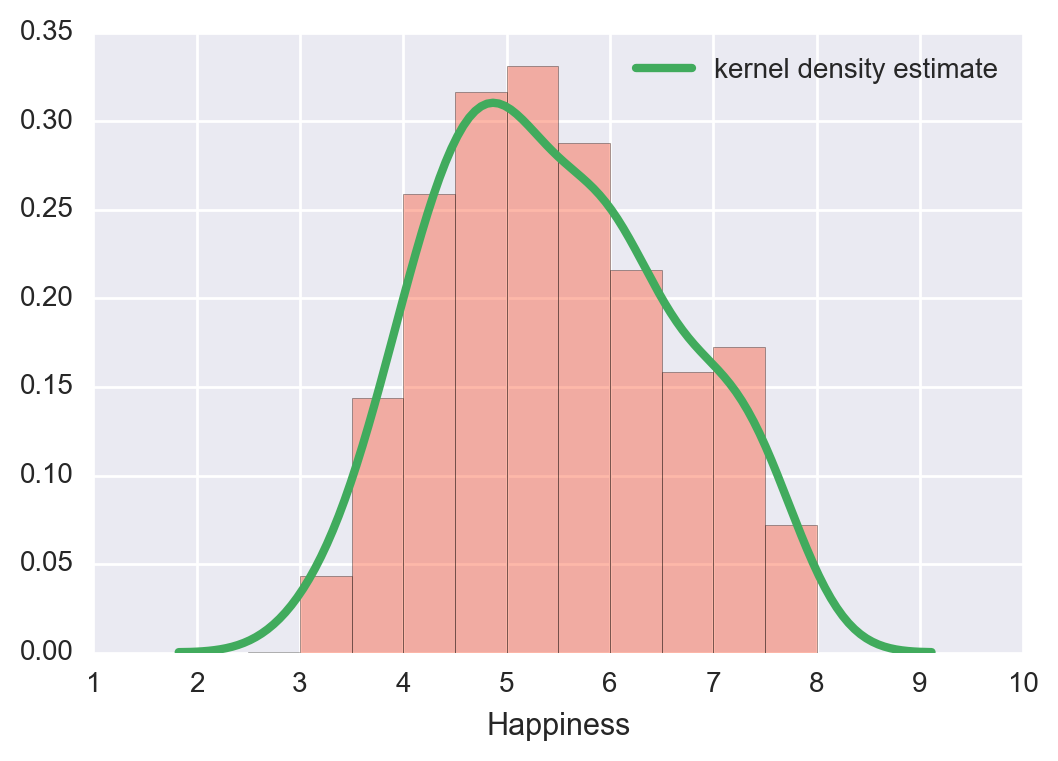

In [55]:
fig, axes = plt.subplots(1, 1, figsize=(6,4))
bins=[2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0,6.5,7.0,7.5,8.0,8.5,9.0]
kde_kws={"color": "#41ab5d", "lw": 3, "label": "kernel density estimate"}
sb.distplot(dataset['Happiness'],bins=bins, kde=True, rug=False,fit=None, hist_kws=None,kde_kws=kde_kws,color='#fc4e2a', vertical=False, norm_hist=False, axlabel='Happiness', label=None, ax=None)

Some descriptive statistic about our Happiness score

In [58]:
dataset['Happiness'].describe()

count    139.000000
mean       5.450866
std        1.128793
min        3.164491
25%        4.587393
50%        5.309076
75%        6.279989
max        7.776209
Name: Happiness, dtype: float64

The distribution of the Happiness score around the world is somehow like the normal distribution with mean value 5.45 and standard deviation 1.128. This makes sense, because as a social phenomenon, what we can expect is that not every are really happy with their life, but other hand, not every feel sad about their life. Most people will be feel not too bad with what they are. The normal distribution is an appropriate curve to describe it.

### Picture GDP vs Happiness:

So first, let's looked the relation between happiness score and the logrithm of GDP per capita

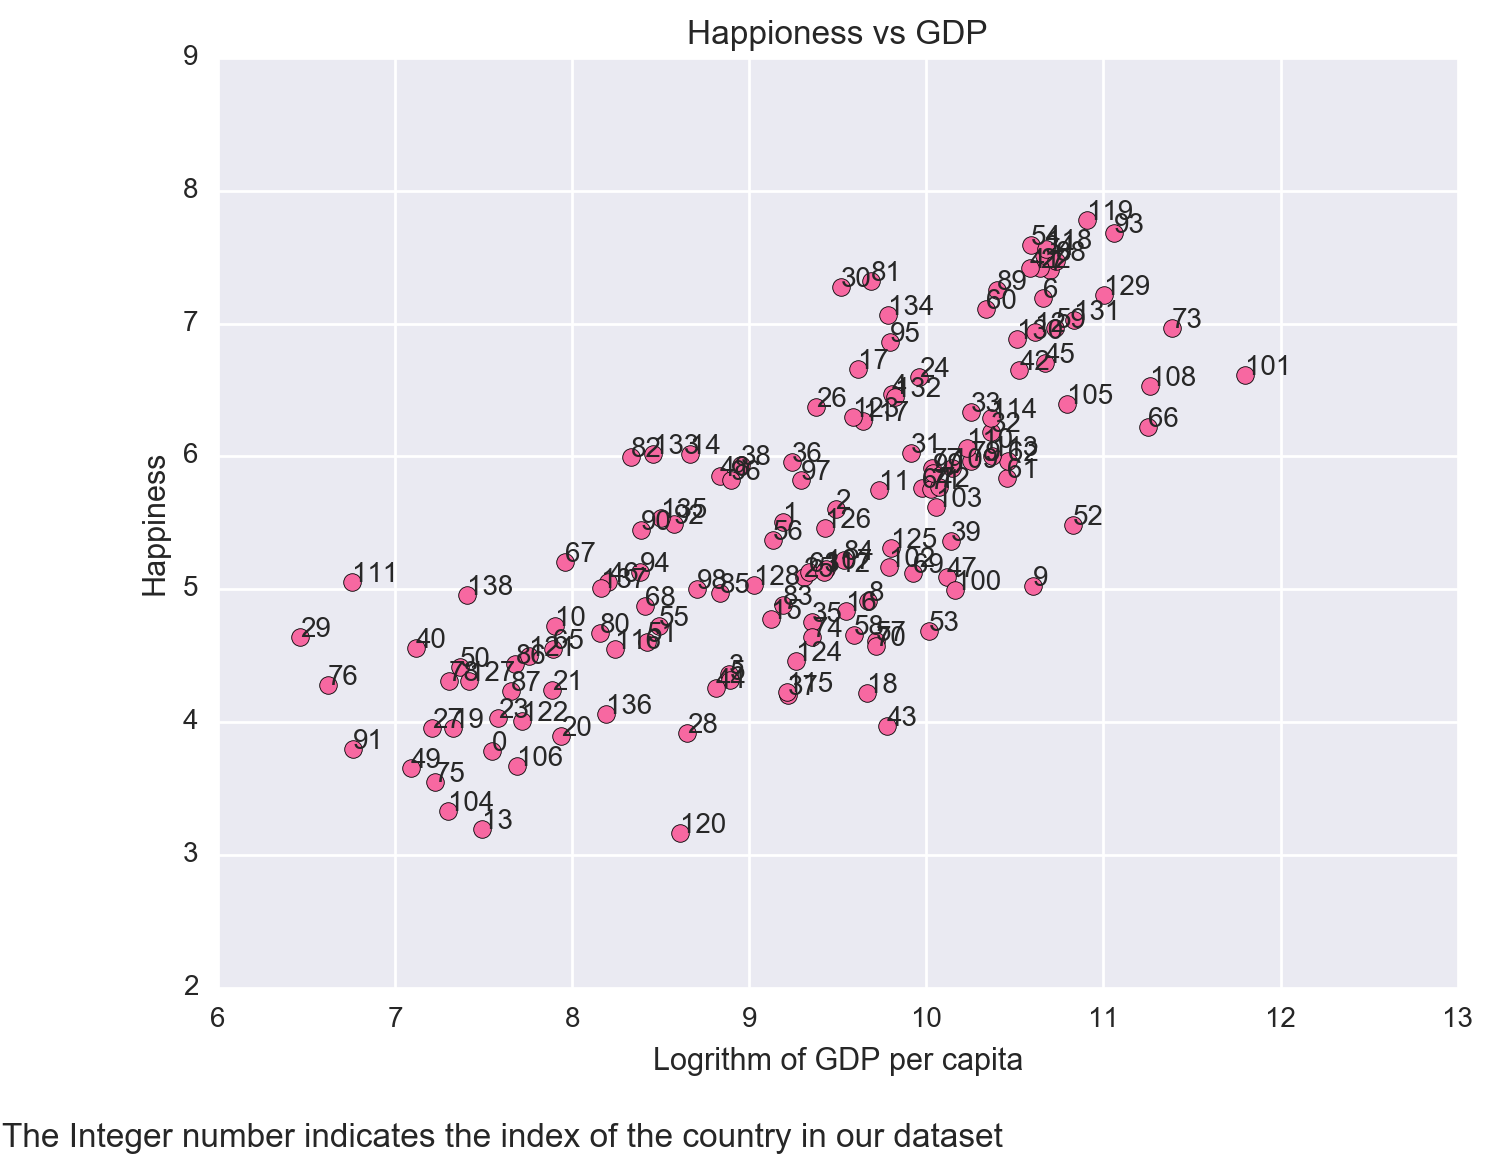

In [45]:
## Here we use the matplotlib scatter plot

fig, axes = plt.subplots(1, 1, figsize=(8,6))

axes.scatter(dataset['Log GDP per capita'], dataset['Happiness'],s=40,c='#f768a1', marker="o")
axes.set_title("Happioness vs GDP")
axes.set_xlabel("Logrithm of GDP per capita")
axes.set_ylabel("Happiness")

for i, txt in enumerate(dataset['country']):
    axes.annotate(i, (dataset['Log GDP per capita'][i],dataset['Happiness'][i]))
    
axes.annotate('The Integer number indicates the index of the country in our dataset', xy=(.8, 3.2), size=12, xycoords='figure points')

As we can see from the picture, There is a strong relation between Happiness score and GDP per capita of the country. Basically speaking, they have a linear correlation. However, if we want ask how strong GDP will affect the happiness and how GDP compares with other factors, we need to build a regression model. There are some outliers that are quite intersting. The first is country No. 120 and the second is country No. 101, the third is No. 29

In [64]:
## Country number 120

print "The country is: ",dataset.loc[120]['country']

The country is:  Syrian Arab Republic


The country has a fair high value of GDP but the people there are not quite happy! They have the lowest happy score, which indicates that there are some other factors affect their happiness.

In [68]:
## Country number 101

print "The country is: ",dataset.loc[101]['country']

The country is:  Qatar


The country has highest value of GDP but the people there are not quite happy! It also tells us that a useful model need to include other factors.

In [69]:
## Country number 29

print "The country is: ",dataset.loc[29]['country']

The country is:  Dem. Rep. Congo


The country is the democratic republic of Congo, which is also known as Congo-Kinshasa. The people in this country have the lowest GDP per capita, but they are really happy with their life!

###  Picture Personal Income vs Happiness:

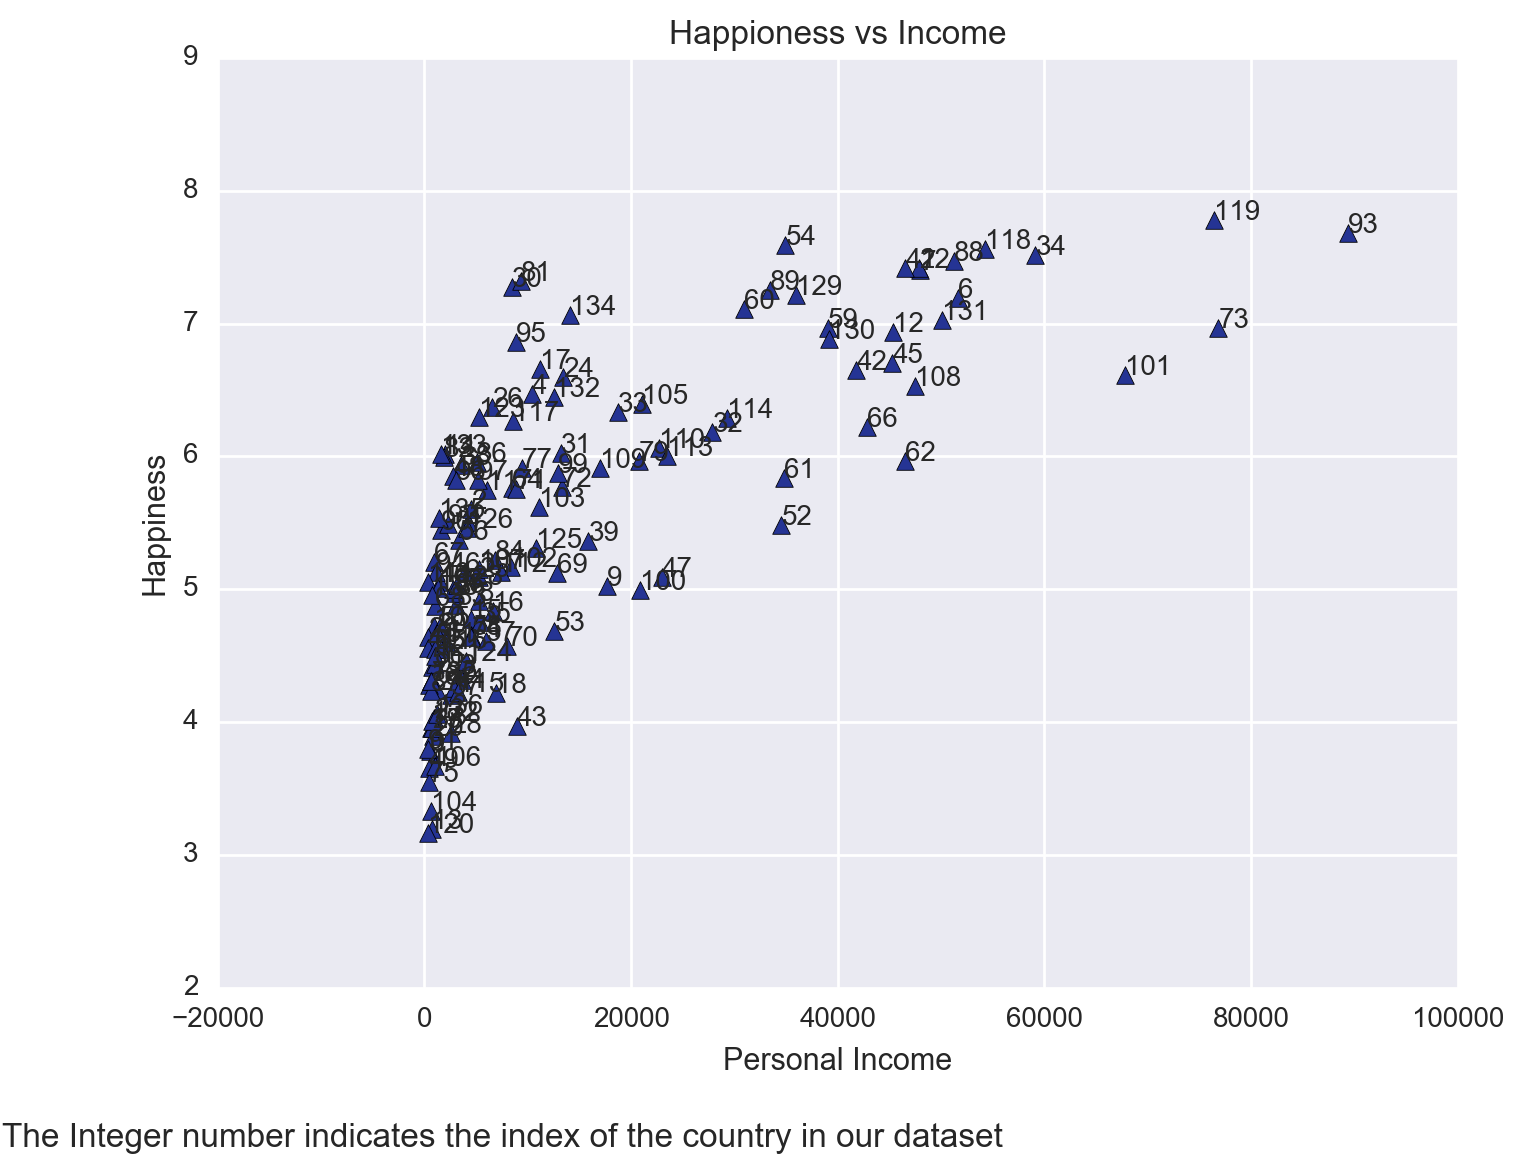

In [47]:
fig, axes = plt.subplots(1, 1, figsize=(8,6))

axes.scatter(dataset['income'], dataset['Happiness'],s=40,c='#253494', marker="^")
axes.set_title("Happioness vs Income")
axes.set_xlabel("Personal Income")
axes.set_ylabel("Happiness")

for i, txt in enumerate(dataset['country']):
    axes.annotate(i, (dataset['income'][i],dataset['Happiness'][i]))
    
axes.annotate('The Integer number indicates the index of the country in our dataset', xy=(.8, 3.2), size=12, xycoords='figure points')

In [19]:
support_mean=dataset['Social support'].mean()

dataset['Support']=(dataset['Social support']>=support_mean).astype(int)
dataset['Ge']=(dataset['Generosity']>=0).astype(int)

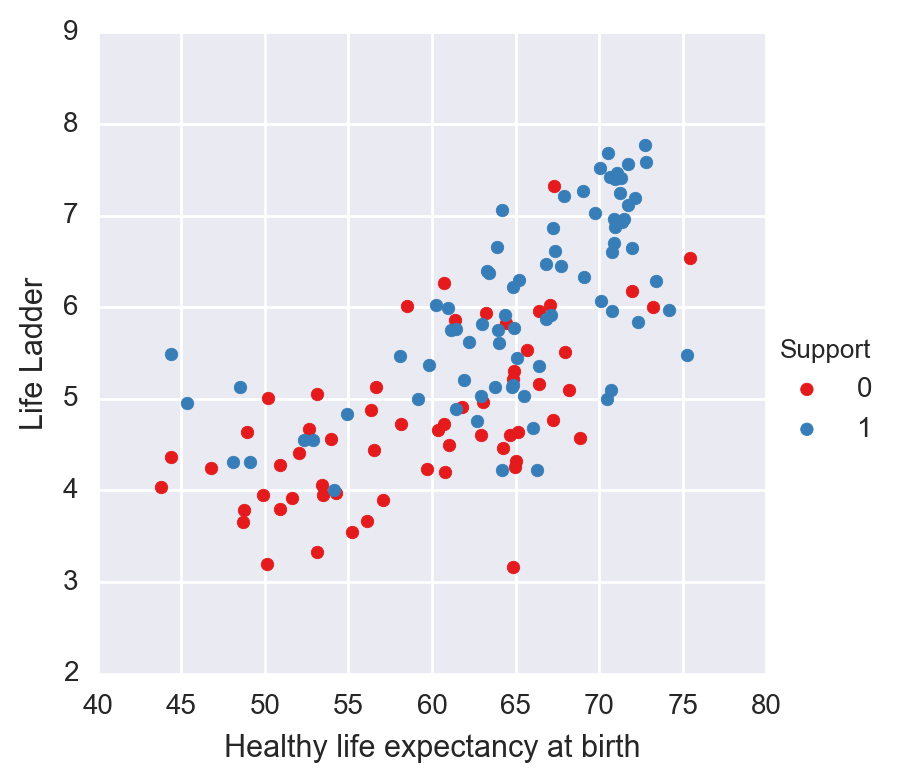

In [25]:
# One piece of information missing in the plots above is what species each plant is
# We'll use seaborn's FacetGrid to color the scatterplot by species
%config InlineBackend.figure_format = 'retina'
sb.FacetGrid(dataset, hue="Support", palette="Set1",size=4).map(plt.scatter, "Healthy life expectancy at birth", "Life Ladder").add_legend()

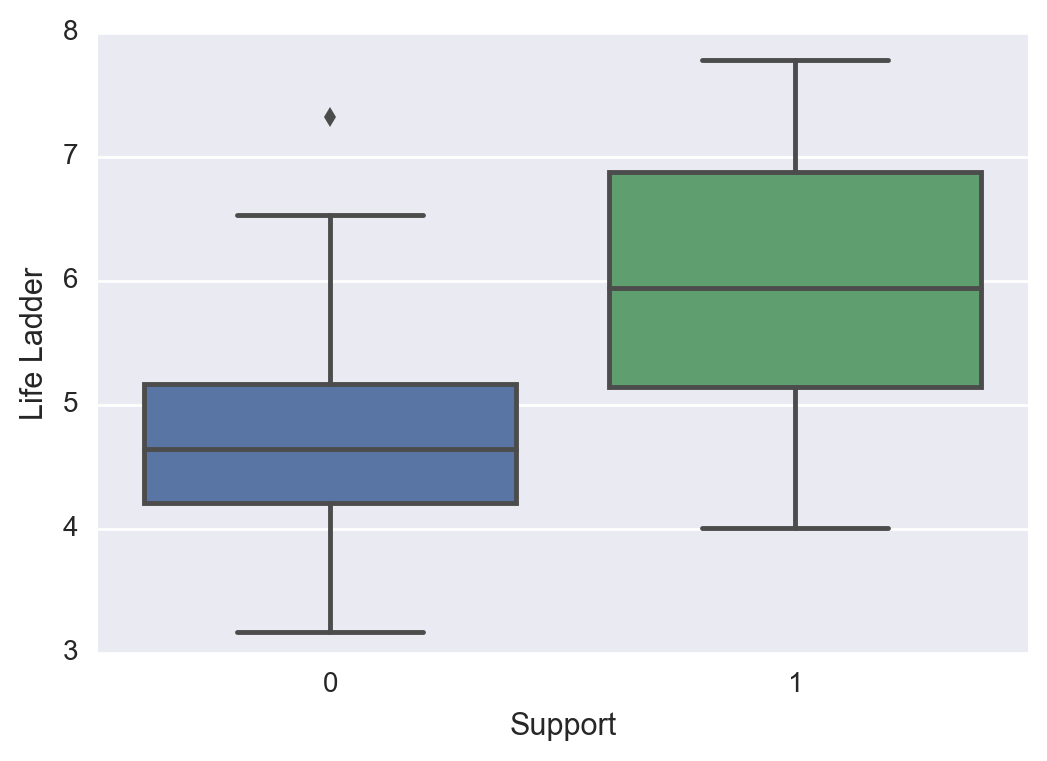

In [26]:
# We can look at an individual feature in Seaborn through a boxplot
sb.boxplot(x="Support", y="Life Ladder", data=dataset)

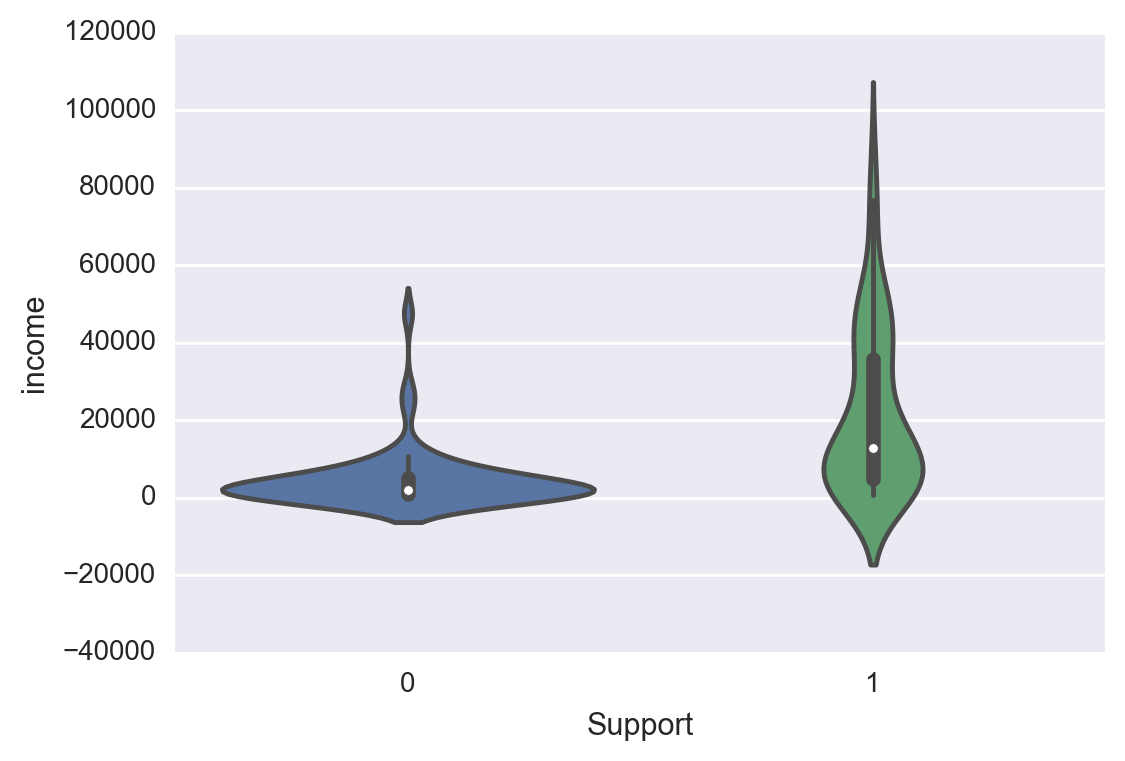

In [27]:
# A violin plot combines the benefits of the previous two plots and simplifies them
# Denser regions of the data are fatter, and sparser thiner in a violin plot
sb.violinplot(x="Support", y="income", data=dataset, size=5)

In [48]:
dataset.columns

Index([u'Unnamed: 0', u'country', u'year', u'Life Ladder',
       u'Log GDP per capita', u'Confidence in national government',
       u'Social support', u'Healthy life expectancy at birth', u'Generosity',
       u'GINI index (World Bank estimate), average 2000-13', u'child',
       u'healthExp', u'publicEdu', u'visitor', u'income', u'homicide',
       u'ecoFree', u'uniEnro', u'aveVis', u'alcohol', u'umemploy', u'Support',
       u'Ge'],
      dtype='object')

In [29]:
data1=dataset[['Life Ladder','Social support']]

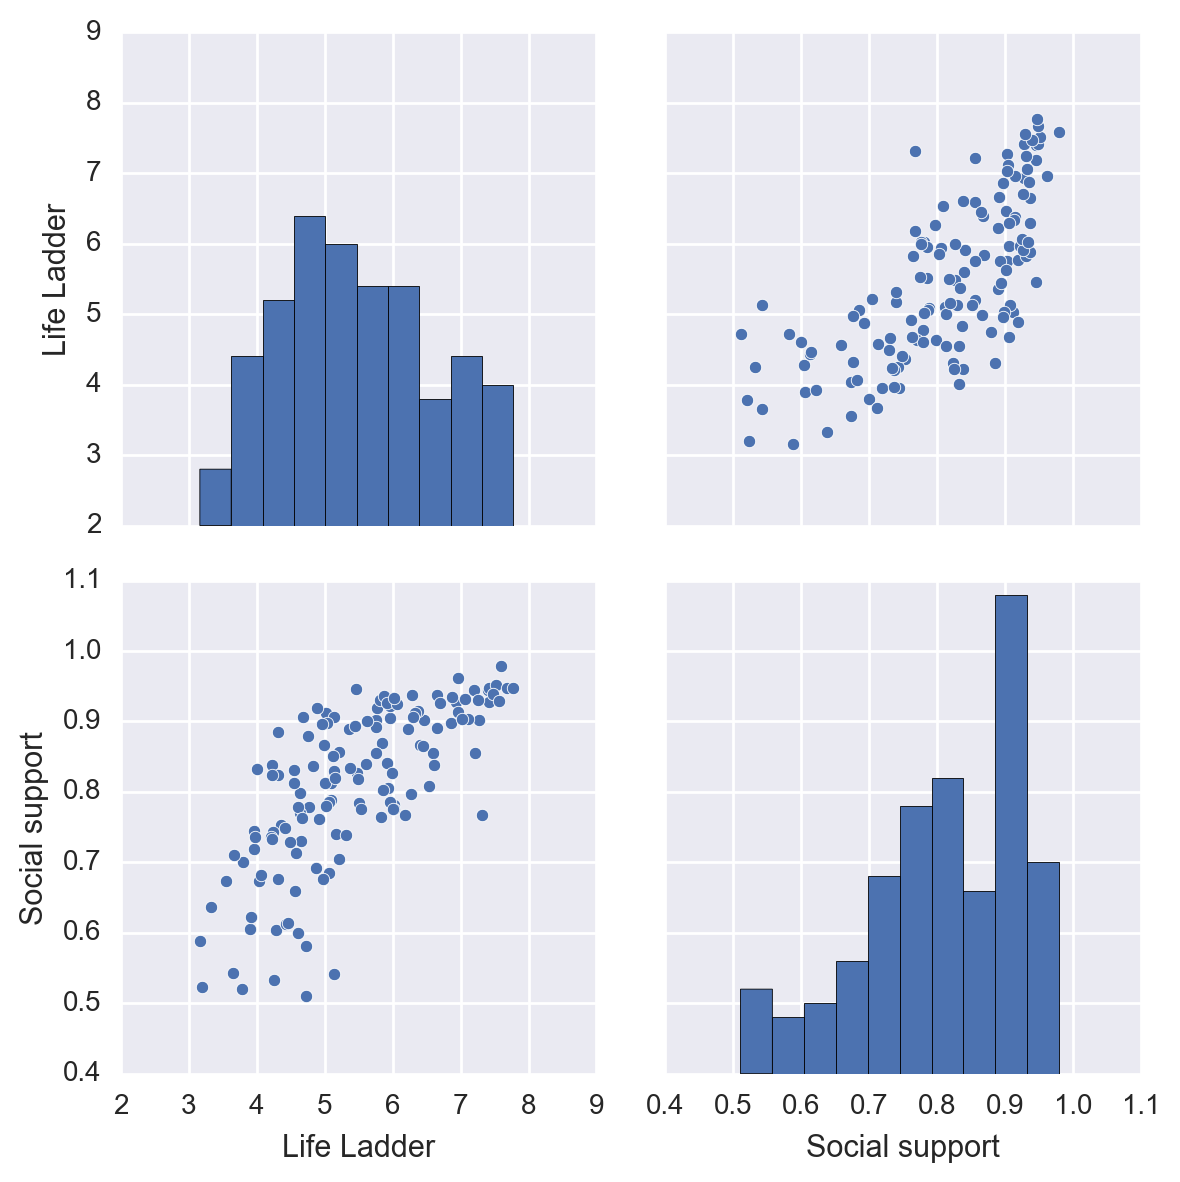

In [30]:
# Another useful seaborn plot is the pairplot, which shows the bivariate relation
# between each pair of features
# 
# From the pairplot, we'll see that the Iris-setosa species is separataed from the other
# two across all feature combinations
sb.pairplot(data1, size=3)

In [37]:
for i, txt in enumerate(dataset['country']):
    print i,txt

0 Afghanistan
1 Albania
2 Algeria
3 Angola
4 Argentina
5 Armenia
6 Australia
7 Austria
8 Azerbaijan
9 Bahrain
10 Bangladesh
11 Belarus
12 Belgium
13 Benin
14 Bolivia (Plurinational State of)
15 Bosnia and Herzegovina
16 Botswana
17 Brazil
18 Bulgaria
19 Burkina Faso
20 Cambodia
21 Cameroon
22 Canada
23 Chad
24 Chile
25 China
26 Colombia
27 Comoros
28 Congo
29 Dem. Rep. Congo
30 Costa Rica
31 Croatia
32 Cyprus
33 Czech Republic
34 Denmark
35 Dominican Republic
36 Ecuador
37 Egypt
38 El Salvador
39 Estonia
40 Ethiopia
41 Finland
42 France
43 Gabon
44 Georgia
45 Germany
46 Ghana
47 Greece
48 Guatemala
49 Guinea
50 Haiti
51 Honduras
52 China, Hong Kong SAR
53 Hungary
54 Iceland
55 India
56 Indonesia
57 Iran (Islamic Republic of)
58 Iraq
59 Ireland
60 Israel
61 Italy
62 Japan
63 Jordan
64 Kazakhstan
65 Kenya
66 Kuwait
67 Kyrgyzstan
68 Lao People's Democratic Republic
69 Latvia
70 Lebanon
71 Libya
72 Lithuania
73 Luxembourg
74 Macedonia
75 Madagascar
76 Malawi
77 Malaysia
78 Mali
79 Malta
80